 #  A Whale off the Port(folio)
 ---

 In this assignment, you'll get to use what you've learned this week to evaluate the performance among various algorithmic, hedge, and mutual fund portfolios and compare them against the S&P TSX 60 Index.

In [37]:
# Initial imports
import pandas as pd
import numpy as np
import datetime as dt
from pathlib import Path
import glob

%matplotlib inline

In [38]:
# Read all necessary CSV files
csv_path = Path("whale_analysis.csv")
csv_path1 = Path("algorithmic_returns.csv")
csv_path2 = Path("sp_tsx_history.csv")

whale_returns = pd.read_csv(csv_path, index_col = "Date", parse_dates = True, infer_datetime_format = True)
algorithmic_returns = pd.read_csv(csv_path1, index_col = "Date", parse_dates = True, infer_datetime_format = True)
sp_tsx_history = pd.read_csv(csv_path2, index_col = "Date", parse_dates = True, infer_datetime_format = True)

# Data Cleaning

In this section, you will need to read the CSV files into DataFrames and perform any necessary data cleaning steps. After cleaning, combine all DataFrames into a single DataFrame.

Files:

* `whale_returns.csv`: Contains returns of some famous "whale" investors' portfolios.

* `algo_returns.csv`: Contains returns from the in-house trading algorithms from Harold's company.

* `sp_tsx_history.csv`: Contains historical closing prices of the S&P TSX 60 Index.

## Whale Returns

Read the Whale Portfolio daily returns and clean the data.

In [39]:
# Reading whale returns
csv_path = Path("whale_analysis.csv")
whale_returns = pd.read_csv(csv_path, index_col = "Date", parse_dates = True, infer_datetime_format = True)
whale_returns

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC
Date,,,,
2015-03-02,NaN,NaN,NaN,NaN
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569
2015-03-04,0.002230,0.003241,-0.002534,0.004213
2015-03-05,0.004016,0.004076,0.002355,0.006726
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098
2015-03-09,0.000582,0.004225,0.005843,-0.001652
2015-03-10,-0.010263,-0.005341,-0.012079,-0.009739
2015-03-11,0.004012,0.005163,0.003312,-0.001147
2015-03-12,0.008265,0.010272,0.013117,0.010801


In [40]:
# Count nulls
whale_returns.isnull().sum()

SOROS FUND MANAGEMENT LLC      1
PAULSON & CO.INC.              1
TIGER GLOBAL MANAGEMENT LLC    1
BERKSHIRE HATHAWAY INC         1
dtype: int64

In [41]:
# Drop nulls
whale_returns.dropna().copy()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC
Date,,,,
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569
2015-03-04,0.002230,0.003241,-0.002534,0.004213
2015-03-05,0.004016,0.004076,0.002355,0.006726
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098
2015-03-09,0.000582,0.004225,0.005843,-0.001652
2015-03-10,-0.010263,-0.005341,-0.012079,-0.009739
2015-03-11,0.004012,0.005163,0.003312,-0.001147
2015-03-12,0.008265,0.010272,0.013117,0.010801
2015-03-13,-0.002497,-0.001428,-0.003697,-0.008142


## Algorithmic Daily Returns

Read the algorithmic daily returns and clean the data.

In [42]:
# Reading algorithmic returns
csv_path = Path("algorithmic_returns.csv")
algorithmic_returns = pd.read_csv(csv_path1, index_col = "Date", parse_dates = True, infer_datetime_format = True)
algorithmic_returns

,Algo 1,Algo 2
Date,,
2014-05-28,0.001745,NaN
2014-05-29,0.003978,NaN
2014-05-30,0.004464,NaN
2014-06-02,0.005692,NaN
2014-06-03,0.005292,NaN
2014-06-04,-0.001838,NaN
2014-06-05,0.004062,0.013285
2014-06-06,0.001857,0.008284
2014-06-09,-0.005012,0.005668


In [43]:
# Count nulls
algorithmic_returns.isnull().sum()

Algo 1    0
Algo 2    6
dtype: int64

In [44]:
# Drop nulls
algorithmic_returns.dropna().copy()

,Algo 1,Algo 2
Date,,
2014-06-05,0.004062,0.013285
2014-06-06,0.001857,0.008284
2014-06-09,-0.005012,0.005668
2014-06-10,0.004406,-0.000735
2014-06-11,0.004760,-0.003761
2014-06-12,-0.000028,-0.003841
2014-06-13,0.001917,-0.000814
2014-06-16,0.001084,0.001831
2014-06-17,0.000922,0.006870


## S&P TSX 60 Returns

Read the S&P TSX 60 historic closing prices and create a new daily returns DataFrame from the data. 

In [45]:
# Reading S&P TSX 60 Closing Prices
csv_path = Path("sp_tsx_history.csv")
sp_tsx_history = pd.read_csv(csv_path2, index_col = "Date", parse_dates = True, infer_datetime_format = True)
sp_tsx_history


,Close
Date,
2012-10-01,"$12,370.19"
2012-10-02,"$12,391.23"
2012-10-03,"$12,359.47"
2012-10-04,"$12,447.68"
2012-10-05,"$12,418.99"
2012-10-09,"$12,273.57"
2012-10-10,"$12,212.42"
2012-10-11,"$12,233.95"
2012-10-12,"$12,202.04"


In [46]:
# Check Data Types
sp_tsx_history.dtypes

Close    object
dtype: object

In [47]:
# Fix Data Types
sp_tsx_history = sp_tsx_history.rename(columns={"Close": "Daily Returns"})

In [48]:
# Remove Signs $ and ,
sp_tsx_history["Daily Returns"] = sp_tsx_history["Daily Returns"].str.replace("$", "")
sp_tsx_history["Daily Returns"] = sp_tsx_history["Daily Returns"].str.replace(",", "")
sp_tsx_history["Daily Returns"].head()

Date
2012-10-01    12370.19
2012-10-02    12391.23
2012-10-03    12359.47
2012-10-04    12447.68
2012-10-05    12418.99
Name: Daily Returns, dtype: object

In [49]:
# Calculate Daily Returns
sp_tsx_history["Daily Returns"] = sp_tsx_history["Daily Returns"].astype('float')
sp_tsx_history["Daily Returns"]
sp_tsx_history["Daily Returns"] = sp_tsx_history["Daily Returns"].pct_change()
sp_tsx_history["Daily Returns"].head()

Date
2012-10-01         NaN
2012-10-02    0.001701
2012-10-03   -0.002563
2012-10-04    0.007137
2012-10-05   -0.002305
Name: Daily Returns, dtype: float64

In [50]:
# Drop nulls
sp_tsx_history.dropna().copy()


,Daily Returns
Date,
2012-10-02,0.001701
2012-10-03,-0.002563
2012-10-04,0.007137
2012-10-05,-0.002305
2012-10-09,-0.011709
2012-10-10,-0.004982
2012-10-11,0.001763
2012-10-12,-0.002608
2012-10-15,0.002288


In [51]:
# Rename `Close` Column to be specific to this portfolio.
# Rename 'Close' to 'COB' Close of Business
sp_tsx_history.rename(columns={'Close': 'COB'})


,Daily Returns
Date,
2012-10-01,NaN
2012-10-02,0.001701
2012-10-03,-0.002563
2012-10-04,0.007137
2012-10-05,-0.002305
2012-10-09,-0.011709
2012-10-10,-0.004982
2012-10-11,0.001763
2012-10-12,-0.002608


## Combine Whale, Algorithmic, and S&P TSX 60 Returns

In [52]:
# Join Whale Returns, Algorithmic Returns, and the S&P TSX 60 Returns into a single DataFrame with columns for each portfolio's returns.
combined_csv = pd.concat([whale_returns, algorithmic_returns, sp_tsx_history], axis = "columns", join = "inner")
combined_csv.head()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,Daily Returns
Date,,,,,,,
2015-03-02,NaN,NaN,NaN,NaN,-0.008158,0.003200,0.001950
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569,-0.001942,-0.000949,-0.008530
2015-03-04,0.002230,0.003241,-0.002534,0.004213,-0.008589,0.002416,-0.003371
2015-03-05,0.004016,0.004076,0.002355,0.006726,-0.000955,0.004323,0.001344
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098,-0.004957,-0.011460,-0.009972


---

In [53]:
# Show 10 Row Sample
combined_csv.head(10)


,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,Daily Returns
Date,,,,,,,
2015-03-02,NaN,NaN,NaN,NaN,-0.008158,0.003200,0.001950
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569,-0.001942,-0.000949,-0.008530
2015-03-04,0.002230,0.003241,-0.002534,0.004213,-0.008589,0.002416,-0.003371
2015-03-05,0.004016,0.004076,0.002355,0.006726,-0.000955,0.004323,0.001344
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098,-0.004957,-0.011460,-0.009972
2015-03-09,0.000582,0.004225,0.005843,-0.001652,-0.005447,0.001303,-0.006555
2015-03-10,-0.010263,-0.005341,-0.012079,-0.009739,-0.001392,-0.012155,-0.014321
2015-03-11,0.004012,0.005163,0.003312,-0.001147,0.002994,0.000605,0.006655
2015-03-12,0.008265,0.010272,0.013117,0.010801,-0.002935,0.011667,0.002139


# Conduct Quantitative Analysis

In this section, you will calculate and visualize performance and risk metrics for the portfolios.

## Performance Anlysis

#### Calculate and Plot the daily returns.

In [54]:
def daily_return(COB):
    return COB[:-1] / COB[1:] - 1

In [57]:
# Plot daily returns of all portfolios
combined_csv["Daily Returns"].plot(figsize=(15, 10), title="Daily Returns", grid=True)
combined_csv["Daily Returns"].head()

TypeError: Cannot interpret '<attribute 'dtype' of 'numpy.generic' objects>' as a data type

#### Calculate and Plot cumulative returns.

In [58]:
# Calculate cumulative returns of all portfolios
cumulative_ret = (combined_csv + 1).cumprod()
# Plot cumulative returns
combined_csv.plot()

TypeError: Cannot interpret '<attribute 'dtype' of 'numpy.generic' objects>' as a data type

---

## Risk Analysis

Determine the _risk_ of each portfolio:

1. Create a box plot for each portfolio. 
2. Calculate the standard deviation for all portfolios.
4. Determine which portfolios are riskier than the S&P TSX 60.
5. Calculate the Annualized Standard Deviation.

### Create a box plot for each portfolio


/Users/mattbuchanan/opt/anaconda3/envs/pyvizenv/lib/python3.7/site-packages/matplotlib/cbook/__init__.py:424: MatplotlibDeprecationWarning: 
Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warn_deprecated("2.2", "Passing one of 'on', 'true', 'off', 'false' as a "


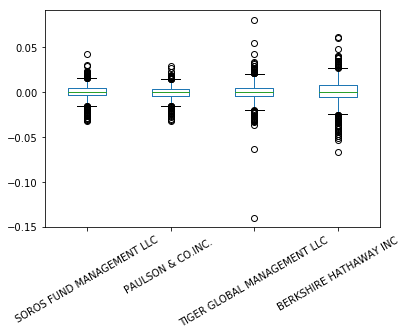

In [98]:
# Box plot to visually show risk
# Box Plot for Whale_Returns
whale_returns.boxplot(grid='false',fontsize=10, rot=30 )


/Users/mattbuchanan/opt/anaconda3/envs/pyvizenv/lib/python3.7/site-packages/numpy/core/_asarray.py:102: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return array(a, dtype, copy=False, order=order)
/Users/mattbuchanan/opt/anaconda3/envs/pyvizenv/lib/python3.7/site-packages/matplotlib/cbook/__init__.py:424: MatplotlibDeprecationWarning: 
Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warn_deprecated("2.2", "Passing one of 'on', 'true', 'off', 'false' as a "


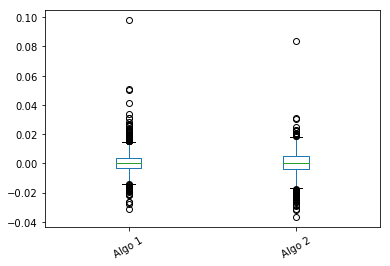

In [97]:
# Box Plot for Algorythmic_Returns
algorithmic_returns.boxplot(grid='false', fontsize=10, rot=30 )

/Users/mattbuchanan/opt/anaconda3/envs/pyvizenv/lib/python3.7/site-packages/matplotlib/cbook/__init__.py:424: MatplotlibDeprecationWarning: 
Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warn_deprecated("2.2", "Passing one of 'on', 'true', 'off', 'false' as a "


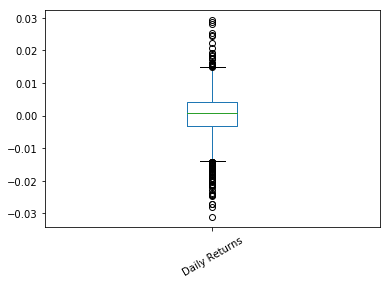

In [99]:
# Box Plot for sp_tsx_history
sp_tsx_history.boxplot(grid='false', fontsize=10, rot=30 )


### Calculate Standard Deviations

In [122]:
# Daily Standard deviation
whale_returns_std= whale_returns.std()
algorithmic_returns_std= algorithmic_returns.std()
sptsxhistory_std= sp_tsx_history.std()

combined_csv_std= combined_csv.std()



In [63]:
print ('Std of whale_returns: ' + str(whale_returns_std))


Std of whale_returns: SOROS FUND MANAGEMENT LLC      0.007842
PAULSON & CO.INC.              0.006977
TIGER GLOBAL MANAGEMENT LLC    0.010824
BERKSHIRE HATHAWAY INC         0.012831
dtype: float64


In [64]:
print ('Std of algorithmic_returns: ' + str(algorithmic_returns_std))


Std of algorithmic_returns: Algo 1    0.007972
Algo 2    0.008466
dtype: float64


In [102]:
print ('Std of sp_tsx_history: ' + str(sptsxhistory_std))

Std of sp_tsx_history: Daily Returns    0.006637
dtype: float64


In [123]:
print ('Std of combined_csv: ' + str(combined_csv_std))

Std of combined_csv: SOROS FUND MANAGEMENT LLC      0.007828
PAULSON & CO.INC.              0.006982
TIGER GLOBAL MANAGEMENT LLC    0.010883
BERKSHIRE HATHAWAY INC         0.012826
Algo 1                         0.007590
Algo 2                         0.008323
Daily Returns                  0.007031
dtype: float64


### Determine which portfolios are riskier than the S&P TSX 60

In [124]:
# Calculate the daily standard deviation of S&P TSX 60
daily_std = sp_tsx_history.rolling(10)
volList = daily_std.std(ddof=0)
volList.head(100)
# Determine which portfolios are riskier than the S&P TSX 60
### All are - Lower STD shows less volatility and therefor less risk, and less reward

,Daily Returns
Date,
2012-10-01,NaN
2012-10-02,NaN
2012-10-03,NaN
2012-10-04,NaN
2012-10-05,NaN
2012-10-09,NaN
2012-10-10,NaN
2012-10-11,NaN
2012-10-12,NaN


### Calculate the Annualized Standard Deviation

In [125]:
# Calculate the annualized standard deviation (252 trading days)
annualised_std = whale_returns_std*np.sqrt(252)
annualised_std.head()

SOROS FUND MANAGEMENT LLC      0.124487
PAULSON & CO.INC.              0.110754
TIGER GLOBAL MANAGEMENT LLC    0.171830
BERKSHIRE HATHAWAY INC         0.203682
dtype: float64

In [126]:
annualised_std1 = algorithmic_returns_std*np.sqrt(252)
annualised_std1.head()

Algo 1    0.126558
Algo 2    0.134401
dtype: float64

In [127]:
annualised_std2 = sptsxhistory_std*np.sqrt(252)
annualised_std2.head()

Daily Returns    0.105365
dtype: float64

---

## Rolling Statistics

Risk changes over time. Analyze the rolling statistics for Risk and Beta. 

1. Calculate and plot the rolling standard deviation for all portfolios using a 21-day window.
2. Calculate the correlation between each stock to determine which portfolios may mimick the S&P TSX 60.
3. Choose one portfolio, then calculate and plot the 60-day rolling beta for it and the S&P TSX 60.

### Calculate and plot rolling `std` for all portfolios with 21-day window

In [128]:
# Calculate the rolling standard deviation for all portfolios using a 21-day window
whale_returns_std= whale_returns.std()
algorithmic_returns_std= algorithmic_returns.std()
sp_tsx_history_std= sptsxhistory_std.std()

# Plot the rolling standard deviation
rolling21_std = whale_returns_std*np.sqrt(21)
rolling21_std.head()



SOROS FUND MANAGEMENT LLC      0.035936
PAULSON & CO.INC.              0.031972
TIGER GLOBAL MANAGEMENT LLC    0.049603
BERKSHIRE HATHAWAY INC         0.058798
dtype: float64

In [129]:
rolling21_std1 = algorithmic_returns_std*np.sqrt(21)
rolling21_std1.head()

Algo 1    0.036534
Algo 2    0.038798
dtype: float64

In [130]:
rolling21_std2 = sptsxhistory_std*np.sqrt(21)
rolling21_std2.head()


Daily Returns    0.030416
dtype: float64

### Calculate and plot the correlation

In [131]:
# Import Seaborn
import seaborn as sns

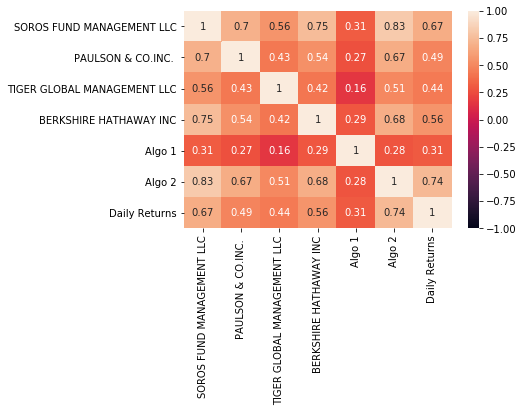

In [132]:
# Calculate the correlation
correlation = combined_csv.corr()
correlation.head()
# Display de correlation matrix
sns.heatmap(combined_csv. corr(), vmin=-1, vmax=1, annot=True)

### Calculate and Plot Beta for a chosen portfolio and the S&P 60 TSX

In [133]:
# Define Daily_Returns Whale Returns
daily_returns = whale_returns.pct_change()
daily_returns.head()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC
Date,,,,
2015-03-02,NaN,NaN,NaN,NaN
2015-03-03,NaN,NaN,NaN,NaN
2015-03-04,-2.762070,-1.650792,4.113646,-1.641381
2015-03-05,0.800968,0.257544,-1.929234,0.596558
2015-03-06,-2.968465,-1.876837,-4.601872,-2.947282


In [134]:
# Calculate covariance of a single portfolio
covariance = daily_returns['whale_returns'].cov
# Calculate variance of S&P TSX
variance = daily_returns['sp_tsx_history'].var
# Computing beta
beta = covariance/variance
# Plot beta trend
beta.plot()

KeyError: 'whale_returns'

## Rolling Statistics Challenge: Exponentially Weighted Average 

An alternative way to calculate a rolling window is to take the exponentially weighted moving average. This is like a moving window average, but it assigns greater importance to more recent observations. Try calculating the [`ewm`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.ewm.html) with a 21-day half-life.

In [135]:
# Use `ewm` to calculate the rolling window
Combined_ewm = combined_csv.ewm(halflife=21).mean()combined_csv.plot(figsize=(15,10), title='Combined Exponentially Weighted Rolling Average 21 day half life', grid=True)

SyntaxError: invalid syntax (<ipython-input-135-e48da0e87245>, line 2)

---

# Sharpe Ratios
In reality, investment managers and thier institutional investors look at the ratio of return-to-risk, and not just returns alone. After all, if you could invest in one of two portfolios, and each offered the same 10% return, yet one offered lower risk, you'd take that one, right?

### Using the daily returns, calculate and visualize the Sharpe ratios using a bar plot

In [138]:
# Annualized Sharpe Ratios
ASR = (daily_returns.mean() * 252) / combined_csv_std     
    

In [140]:
# Visualize the sharpe ratios as a bar plot
ASR.plot.bar(figsize=(15,10), title="Annualised Sharpe Ratio", grid=True)

TypeError: Cannot interpret '<attribute 'dtype' of 'numpy.generic' objects>' as a data type

### Determine whether the algorithmic strategies outperform both the market (S&P TSX 60) and the whales portfolios.

Write your answer here!

---

# Create Custom Portfolio

In this section, you will build your own portfolio of stocks, calculate the returns, and compare the results to the Whale Portfolios and the S&P TSX 60. 

1. Choose 3-5 custom stocks with at last 1 year's worth of historic prices and create a DataFrame of the closing prices and dates for each stock.
2. Calculate the weighted returns for the portfolio assuming an equal number of shares for each stock.
3. Join your portfolio returns to the DataFrame that contains all of the portfolio returns.
4. Re-run the performance and risk analysis with your portfolio to see how it compares to the others.
5. Include correlation analysis to determine which stocks (if any) are correlated.

## Choose 3-5 custom stocks with at last 1 year's worth of historic prices and create a DataFrame of the closing prices and dates for each stock.

For this demo solution, we fetch data from three companies listes in the S&P TSX 60 index.

* `SHOP` - [Shopify Inc](https://en.wikipedia.org/wiki/Shopify)

* `OTEX` - [Open Text Corporation](https://en.wikipedia.org/wiki/OpenText)

* `L` - [Loblaw Companies Limited](https://en.wikipedia.org/wiki/Loblaw_Companies)

In [79]:
# Reading data from 1st stock


In [80]:
# Reading data from 2nd stock


In [81]:
# Reading data from 3rd stock


In [82]:
# Combine all stocks in a single DataFrame


In [83]:
# Reset Date index


In [84]:
# Reorganize portfolio data by having a column per symbol


In [85]:
# Calculate daily returns

# Drop NAs

# Display sample data


## Calculate the weighted returns for the portfolio assuming an equal number of shares for each stock

In [86]:
# Set weights
weights = [1/3, 1/3, 1/3]

# Calculate portfolio return

# Display sample data


## Join your portfolio returns to the DataFrame that contains all of the portfolio returns

In [87]:
# Join your returns DataFrame to the original returns DataFrame


In [88]:
# Only compare dates where return data exists for all the stocks (drop NaNs)


## Re-run the risk analysis with your portfolio to see how it compares to the others

### Calculate the Annualized Standard Deviation

In [89]:
# Calculate the annualized `std`


### Calculate and plot rolling `std` with 21-day window

In [90]:
# Calculate rolling standard deviation

# Plot rolling standard deviation


### Calculate and plot the correlation

In [91]:
# Calculate and plot the correlation


### Calculate and Plot the 60-day Rolling Beta for Your Portfolio compared to the S&P 60 TSX

In [92]:
# Calculate and plot Beta


### Using the daily returns, calculate and visualize the Sharpe ratios using a bar plot

In [93]:
# Calculate Annualzied Sharpe Ratios


In [94]:
# Visualize the sharpe ratios as a bar plot


### How does your portfolio do?

Write your answer here!